In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train_data.csv")

In [3]:
test = pd.read_csv("test_data.csv")

In [4]:
train.columns

Index(['id', 'pixels', 'class'], dtype='object')

In [5]:
test.columns

Index(['id', 'pixels'], dtype='object')

Oh what, pixels

In [6]:
train["pixels"]

0      [-0.10046728971962617, -0.10046728971962617, -...
1      [-0.10046728971962617, -0.10046728971962617, -...
2      [-0.10046728971962617, -0.10046728971962617, -...
3      [-0.10046728971962617, -0.10046728971962617, -...
4      [-0.10046728971962617, -0.10046728971962617, -...
                             ...                        
851    [-0.10046728971962617, -0.10046728971962617, -...
852    [-0.10046728971962617, -0.10046728971962617, -...
853    [-0.10046728971962617, -0.10046728971962617, -...
854    [-0.10046728971962617, -0.10046728971962617, -...
855    [-0.10046728971962617, -0.10046728971962617, -...
Name: pixels, Length: 856, dtype: object

In [8]:
one_row_pixel = train["pixels"][0]

In [13]:
one_row_pixel

'[-0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10046728971962617, -0.10514018691588785, -0.16355140186915887, -0.2967289719626168, -0.3516355140186916, -0.3235981308411215, -0.5, -0.5490654205607477, -0.48130841121495327, -0.30957943925233644, -0.33761682242990654, -0.3446261682242991, -0.35046728971962615, -0.3247663551401869, -0.2570093457943925, -0.30257009345794394, -0.19742990654205608, -0.14953271028037382, -0.10163551401869159, -0.102803738317757, -0.10163551401869159, -0.10046728971962617, -0.10046728971962617, -0.10046728

In [24]:
one_row_pixel_parsed = [float(i.strip()) for i in one_row_pixel[1:-1].split(",")]

In [25]:
len(one_row_pixel_parsed)

4096

In [26]:
4096 ** 0.5

64.0

In [22]:
train["parsed_pixels"] = train["pixels"].apply(lambda x: [float(i.strip()) for i in x[1:-1].split(",")])

In [23]:
train["parsed_pixels"]

0      [-0.10046728971962617, -0.10046728971962617, -...
1      [-0.10046728971962617, -0.10046728971962617, -...
2      [-0.10046728971962617, -0.10046728971962617, -...
3      [-0.10046728971962617, -0.10046728971962617, -...
4      [-0.10046728971962617, -0.10046728971962617, -...
                             ...                        
851    [-0.10046728971962617, -0.10046728971962617, -...
852    [-0.10046728971962617, -0.10046728971962617, -...
853    [-0.10046728971962617, -0.10046728971962617, -...
854    [-0.10046728971962617, -0.10046728971962617, -...
855    [-0.10046728971962617, -0.10046728971962617, -...
Name: parsed_pixels, Length: 856, dtype: object

In [40]:
import numpy as np

In [49]:
imlist = []
for i in train["parsed_pixels"]:
    imlist.append(np.array(i))

In [50]:
len(imlist)

856

In [51]:
imarr = np.array(imlist)

In [52]:
imarr.shape

(856, 4096)

In [53]:
global_mean_vec = imarr.mean(axis=0)

In [54]:
global_mean_vec.shape

(4096,)

In [55]:
len(train)

856

In [56]:
ans1 = []
for i in imlist:
    arr_row = np.array(i)
    centered_row = arr_row - global_mean_vec
    ans1.append(centered_row)

In [59]:
train.columns

Index(['id', 'pixels', 'class', 'parsed_pixels'], dtype='object')

In [60]:
subtask1 = pd.DataFrame(data={
    "subtaskID": [1] * len(train),
    "datapointID": train["id"],
    "answer": ans1
})

In [61]:
subtask1.to_csv("task1.csv")

Actually what do they look like?

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
train

,id,pixels,class,parsed_pixels
0,15002,"[-0.10046728971962617, -0.10046728971962617, -...",1,"[-0.10046728971962617, -0.10046728971962617, -..."
1,15003,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
2,15006,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
3,15010,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
4,15011,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
...,...,...,...,...
851,16993,"[-0.10046728971962617, -0.10046728971962617, -...",1,"[-0.10046728971962617, -0.10046728971962617, -..."
852,16996,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
853,16997,"[-0.10046728971962617, -0.10046728971962617, -...",0,"[-0.10046728971962617, -0.10046728971962617, -..."
854,16999,"[-0.10046728971962617, -0.10046728971962617, -...",1,"[-0.10046728971962617, -0.10046728971962617, -..."


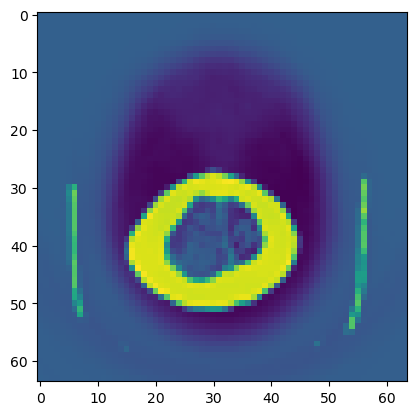

In [64]:
plt.imshow(imarr[0].reshape((64, 64)))

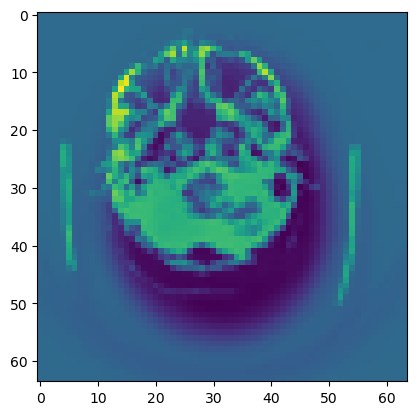

In [66]:
plt.imshow(imarr[1].reshape((64, 64)))

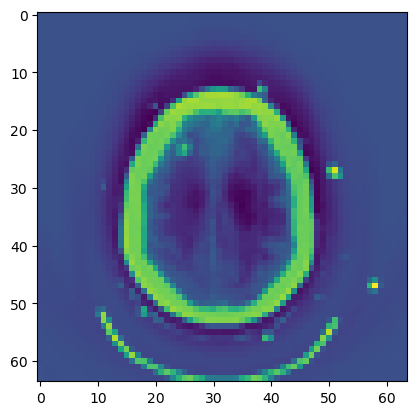

In [67]:
plt.imshow(imarr[854].reshape((64, 64)))

Might as well extract test and work on this in another env with pytorch.

In [68]:
test["parsed_pixels"] = test["pixels"].apply(lambda x: [float(i.strip()) for i in x[1:-1].split(",")])

In [69]:
test_centered_pixels = []
for i in test["parsed_pixels"]:
    centered_row = arr_row - global_mean_vec
    test_centered_pixels.append(centered_row)

In [73]:
with open("test.npy", "wb") as f:
    np.save(f, np.array(test_centered_pixels))

In [74]:
with open("train.npy", "wb") as f:
    np.save(f, np.array(imarr))